# Análise
## 1000 tweets que mais receberam RTs
## 1000 tweets que mais foram favoritados

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

from joblib import load

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('datasets\\base_original.csv')
df.drop(['username', 'to', 'geo', 'mentions', 'hashtags', 'id'] , axis=1)

,date,replies,retweets,favorites,text,permalink
0,2019-01-31 23:59:17,0,0,0,☝️E jornalista sabichão apoiando reforma fasci...,https://twitter.com/lucrjviola/status/10911237...
1,2019-01-31 23:59:03,0,0,0,Isso é só uma demostração do que virar quando ...,https://twitter.com/vanessa88alves/status/1091...
2,2019-01-31 23:57:31,0,0,0,Governo diz que espera aprovar reforma da Prev...,https://twitter.com/FaceNewsJp/status/10911233...
3,2019-01-31 23:56:44,0,0,0,"Joice, mudadando de assunto, é verdade q o gov...",https://twitter.com/NAIARASB1/status/109112314...
4,2019-01-31 23:56:20,1,0,2,meu pai foi muito bolsominion arrepedindo fala...,https://twitter.com/vittRosa/status/1091123043...
...,...,...,...,...,...,...
980572,2019-11-01 00:03:11,0,0,0,Amoedo fosse presidente estaria jantando com R...,https://twitter.com/JOM_BR/status/119005665733...
980573,2019-11-01 00:02:37,0,0,2,Essa devia ter sido a primeira reforma. Depois...,https://twitter.com/traderdareal/status/119005...
980574,2019-11-01 00:00:52,0,0,1,Se for preciso podemos fazer uma vakinha p ela...,https://twitter.com/Luiz_C_Cardoso/status/1190...
980575,2019-11-01 00:00:04,0,0,0,Sindicato tenta barrar reforma da previdência ...,https://twitter.com/carlosbuenoDG/status/11900...


## Mais retweetados

In [3]:
df.sort_values('retweets', ascending=False).head(10).drop(['to', 'geo', 'mentions', 'hashtags', 'id'], axis=1)

,date,username,replies,retweets,favorites,text,permalink
692243,2019-07-15 14:11:59,jozecoms,117,29367,68769,morrer de estudar pra passar em uma federal (q...,https://twitter.com/jozecoms/status/1150769985...
543860,2019-05-06 02:54:37,vitornasc,267,16459,39671,TRIGÉSIMO OITAVO PRESIDENTE DA REPÚBLICA FEDER...,https://twitter.com/vitornasc/status/112523237...
447100,2019-05-25 17:08:23,alexandregarcia,2022,13882,65581,Ouvi palestra de Paulo Guedes. Ele é genial. S...,https://twitter.com/alexandregarcia/status/113...
367058,2019-04-12 10:43:19,okmatheuso,70,11621,39931,Se a reforma da previdência for aprovada cenas...,https://twitter.com/okmatheuso/status/11166530...
384691,2019-04-08 13:23:21,pdrmuriel,271,11151,30521,- extermínio e violência contra a população ne...,https://twitter.com/pdrmuriel/status/111524373...
26622,2019-01-04 09:11:42,jairbolsonaro,6689,10672,78530,O auxílio-reclusão ultrapassa o valor do salár...,https://twitter.com/jairbolsonaro/status/10811...
210013,2019-03-22 10:23:54,JanainaDoBrasil,5416,10533,52941,Quando o Presidente da Câmara ameaça deixar a ...,https://twitter.com/JanainaDoBrasil/status/110...
65774,2019-02-21 23:58:45,mah13MC,176,10068,27017,A Marinha não quer entrar na Reforma da Previd...,https://twitter.com/mah13MC/status/10987337992...
825089,2019-08-13 20:51:11,newbips,22,9258,28129,"holy shit, is this a motherfucking reforma da ...",https://twitter.com/newbips/status/11613796972...
526256,2019-05-09 09:59:19,AFS_Andrada,191,9013,30236,Reforma da previdência de Jair Bolsonaro e Pau...,https://twitter.com/AFS_Andrada/status/1126426...


## Mais favoritados

In [4]:
df.sort_values('favorites', ascending=False).head(10).drop(['to', 'geo', 'mentions', 'hashtags', 'id'], axis=1)

,date,username,replies,retweets,favorites,text,permalink
26622,2019-01-04 09:11:42,jairbolsonaro,6689,10672,78530,O auxílio-reclusão ultrapassa o valor do salár...,https://twitter.com/jairbolsonaro/status/10811...
692243,2019-07-15 14:11:59,jozecoms,117,29367,68769,morrer de estudar pra passar em uma federal (q...,https://twitter.com/jozecoms/status/1150769985...
447100,2019-05-25 17:08:23,alexandregarcia,2022,13882,65581,Ouvi palestra de Paulo Guedes. Ele é genial. S...,https://twitter.com/alexandregarcia/status/113...
210013,2019-03-22 10:23:54,JanainaDoBrasil,5416,10533,52941,Quando o Presidente da Câmara ameaça deixar a ...,https://twitter.com/JanainaDoBrasil/status/110...
265763,2019-03-07 19:53:28,jairbolsonaro,4094,6547,48734,Os avanços que o Brasil precisa dependem da ap...,https://twitter.com/jairbolsonaro/status/11037...
748329,2019-07-10 20:22:37,tabataamaralsp,28645,4907,45477,Meu voto pela Reforma da Previdência não foi v...,https://twitter.com/tabataamaralsp/status/1149...
80239,2019-02-20 23:20:09,jairbolsonaro,3858,7203,41756,Nenhuma outra proposta de reforma foi tão firm...,https://twitter.com/jairbolsonaro/status/10983...
770796,2019-07-09 11:30:41,JanainaDoBrasil,2943,6563,41116,Depois da Reforma da Previdência (que há de pa...,https://twitter.com/JanainaDoBrasil/status/114...
367058,2019-04-12 10:43:19,okmatheuso,70,11621,39931,Se a reforma da previdência for aprovada cenas...,https://twitter.com/okmatheuso/status/11166530...
906070,2019-10-24 12:07:07,BolsonaroSP,4479,7705,39883,"O pessoal que fica falando que você é gado, bo...",https://twitter.com/BolsonaroSP/status/1187339...


In [5]:
users_mais_retuitados = []
users_mais_favoritados = []

for i in df.sort_values('retweets', ascending=False).head(1000)['username']:
    if i not in users_mais_retuitados:
        users_mais_retuitados.append(i)

for i in df.sort_values('favorites', ascending=False).head(1000)['username']:
    if i not in users_mais_favoritados:
        users_mais_favoritados.append(i)

In [6]:
len(users_mais_retuitados)

314

In [7]:
len(users_mais_favoritados)

276

### 314 usuários produziram os 1000 tweets mais retweetados
### 276 usuários produziram os 1000 tweets mais favoritados

<hr>

## Classificação

In [8]:
df2 = pd.read_csv('base_processada.csv')
df2.drop('username', axis=1)  # hiding usernames

,month,cap,retweets,favorites,text,processed_text
0,Janeiro,0.660850,0,0,☝️E jornalista sabichão apoiando reforma fasci...,emoticon_positivo ️ jornalista sabichão apoian...
1,Janeiro,NaN,0,0,Isso é só uma demostração do que virar quando ...,demostração virar chegar congresso
2,Janeiro,0.866291,0,0,Governo diz que espera aprovar reforma da Prev...,governo diz espera aprovar 1º semestre
3,Janeiro,0.260368,0,0,"Joice, mudadando de assunto, é verdade q o gov...",joice mudadando assunto verdade governo pedind...
4,Janeiro,NaN,0,2,meu pai foi muito bolsominion arrepedindo fala...,pai bolsominion arrepedindo falando discurso m...
...,...,...,...,...,...,...
980572,Novembro,0.743721,0,0,Amoedo fosse presidente estaria jantando com R...,amoedo presidente estaria jantando rodrigo mai...
980573,Novembro,0.346921,0,2,Essa devia ter sido a primeira reforma. Depois...,devia ter sido primeira modernização decente c...
980574,Novembro,0.376790,0,1,Se for preciso podemos fazer uma vakinha p ela...,preciso podemos fazer vakinha ir pessoalmente ...
980575,Novembro,0.847463,0,0,Sindicato tenta barrar reforma da previdência ...,sindicato tenta barrar governo goiás justiça


In [9]:
# 1000 with more retweets
rts = df2.sort_values('retweets', ascending=False).head(1000)

# 1000 with more favs
favs = df2.sort_values('favorites', ascending=False).head(1000)

In [10]:
bots_rts = []
bots_favs = []

for i in rts.itertuples():
    if i[3] >= 0.90 and i[2] not in bots_rts:
        bots_rts.append(i[2])

for i in favs.itertuples():
    if i[3] >= 0.90 and i[2] not in bots_favs:
        bots_favs.append(i[2])

In [11]:
len(bots_favs)

0

In [12]:
len(bots_rts)

0

### Nenhum bot encontrado nos 1000 tuítes mais favoritados e nos 1000 mais retweetados

In [13]:
# loading models
naive_bayes = load('models\\naive_bayes.joblib')
logistic_regression = load('models\\logistic_regression.joblib')
linear_SVM = load('models\\linear_SVM.joblib')
random_forest = load('models\\random_forest.joblib')

tfidf_transformer = load('models\\vectorizer.joblib')

In [14]:
df2['processed_text'] = df2['processed_text'].fillna('')

In [15]:
X_tfidf = tfidf_transformer.transform(df2['processed_text'])

y_previsto_MNB =  naive_bayes.predict(X_tfidf)
y_previsto_LR = logistic_regression.predict(X_tfidf)
y_previsto_LSVM = linear_SVM.predict(X_tfidf)
y_previsto_RF = random_forest.predict(X_tfidf)

In [16]:
resultado = pd.DataFrame(data={'month': df2['month'], 'username': df2['username'], 'cap': df2['cap'], 'retweets': df2['retweets'], 'favorites': df2['favorites'], 'text' : df2['text'],
 'processed_text' : df2['processed_text'], 'Naive_Bayes' : y_previsto_MNB, 'Logistic_Regression' : y_previsto_LR, 'SVM' : y_previsto_LSVM, 'Random_Forest' : y_previsto_RF})

In [17]:
classificacao_mais_rts = resultado.sort_values('retweets', ascending=False).head(1000)
classificacao_mais_favs = resultado.sort_values('favorites', ascending=False).head(1000)

## 1000 mais retweetados

In [18]:
nb = Counter(classificacao_mais_rts['Naive_Bayes'])
lr = Counter(classificacao_mais_rts['Logistic_Regression'])
svm = Counter(classificacao_mais_rts['SVM'])
rf = Counter(classificacao_mais_rts['Random_Forest'])

In [19]:
print(f'NB: {nb}')
print(f'LR: {lr}')
print(f'SVM: {svm}')
print(f'rf: {rf}')

NB: Counter({'Positivo': 419, 'Neutro': 394, 'Negativo': 187})
LR: Counter({'Neutro': 717, 'Positivo': 250, 'Negativo': 33})
SVM: Counter({'Neutro': 701, 'Positivo': 259, 'Negativo': 40})
rf: Counter({'Neutro': 861, 'Positivo': 91, 'Negativo': 48})


In [20]:
nb_values = [nb['Positivo'], nb['Neutro'], nb['Negativo']]
lr_values = [lr['Positivo'], lr['Neutro'], lr['Negativo']]
svm_values = [svm['Positivo'], svm['Neutro'], svm['Negativo']]
rf_values = [rf['Positivo'], rf['Neutro'], rf['Negativo']]

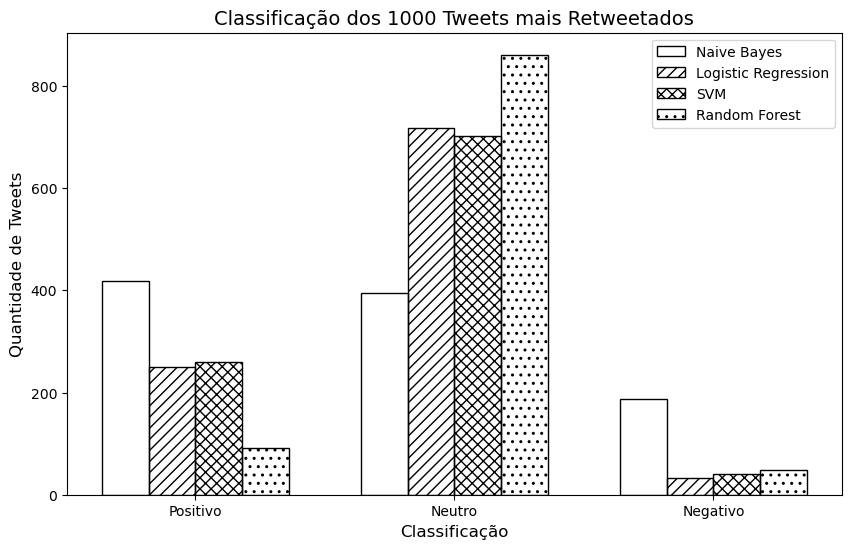

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

labels = ['Positivo', 'Neutro', 'Negativo']

x = np.arange(len(labels))
w = 0.18  # width

ax.bar(x, nb_values, w, label='Naive Bayes', fill=False, edgecolor='black')
ax.bar(x + w, lr_values, w, label='Logistic Regression', hatch='///', fill=False, edgecolor='black')
ax.bar(x + (2*w), svm_values, w, label='SVM', hatch='xxx', fill=False, edgecolor='black')
ax.bar(x + (3*w), rf_values, w, label='Random Forest', hatch='..', fill=False, edgecolor='black')

ax.set_title('Classificação dos 1000 Tweets mais Retweetados', fontsize=14)
ax.set_ylabel('Quantidade de Tweets', fontsize=12)
ax.set_xlabel('Classificação', fontsize=12)
ax.set_xticks(x+(3*w)/2)
ax.set_xticklabels(labels)


ax.legend(fontsize=10)
plt.show()

## 1000 mais favoritados

In [22]:
nb2 = Counter(classificacao_mais_favs['Naive_Bayes'])
lr2 = Counter(classificacao_mais_favs['Logistic_Regression'])
svm2 = Counter(classificacao_mais_favs['SVM'])
rf2 = Counter(classificacao_mais_favs['Random_Forest'])

In [23]:
nb_values2 = [nb2['Positivo'], nb2['Neutro'], nb2['Negativo']]
lr_values2 = [lr2['Positivo'], lr2['Neutro'], lr2['Negativo']]
svm_values2 = [svm2['Positivo'], svm2['Neutro'], svm2['Negativo']]
rf_values2 = [rf2['Positivo'], rf2['Neutro'], rf2['Negativo']]

In [24]:
print(f'NB: {nb2}')
print(f'LR: {lr2}')
print(f'SVM: {svm2}')
print(f'rf: {rf2}')

NB: Counter({'Positivo': 434, 'Neutro': 382, 'Negativo': 184})
LR: Counter({'Neutro': 708, 'Positivo': 262, 'Negativo': 30})
SVM: Counter({'Neutro': 689, 'Positivo': 274, 'Negativo': 37})
rf: Counter({'Neutro': 851, 'Positivo': 96, 'Negativo': 53})


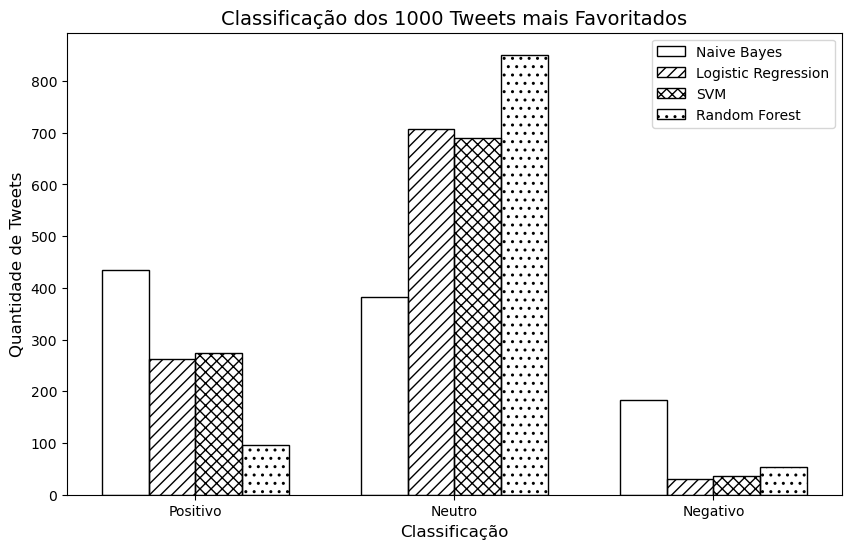

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

labels = ['Positivo', 'Neutro', 'Negativo']

x = np.arange(len(labels))
w = 0.18  # width

ax.bar(x, nb_values2, w, label='Naive Bayes', fill=False, edgecolor='black')
ax.bar(x + w, lr_values2, w, label='Logistic Regression', hatch='///', fill=False, edgecolor='black')
ax.bar(x + (2*w), svm_values2, w, label='SVM', hatch='xxx', fill=False, edgecolor='black')
ax.bar(x + (3*w), rf_values2, w, label='Random Forest', hatch='..', fill=False, edgecolor='black')

ax.set_title('Classificação dos 1000 Tweets mais Favoritados', fontsize=14)
ax.set_ylabel('Quantidade de Tweets', fontsize=12)
ax.set_xlabel('Classificação', fontsize=12)
ax.set_xticks(x+(3*w)/2)
ax.set_xticklabels(labels)


ax.legend(fontsize=10)
plt.show()